# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## seaborn
> - 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
> - 다양한 형태의 시각화도구를 제공. 
> - 기본적인 심미성이 뛰어나 특별한 옵션 설정을 하지 않아도 예쁜 그래프 출력이 가능하다.

In [15]:
# 패키지 설치
# !pip install seaborn

# 패키지 import
import numpy as np # 수리연산, 선형대수학적 연산을 구현하는 파이썬 패키지
import pandas as pd # numpy를 기반으로 한 데이터를 다룰 수 있는 패키지
import matplotlib.pyplot as plt # MATLAB기반의 시각화 패키지 시각화계의 numpy
import seaborn as sns # matplotlib 기반의 시각화 패키지
plt.rcParams['axes.unicode_minus'] = False # 한글폰트에서 마이너스 특문 표현시 특문 깨짐 해결 코드
plt.rcParams['font.family'] = 'arial' # 한글폰트 설정 코드 # 'batang'
import warnings
warnings.filterwarnings(action='ignore')

# 코랩 사용자분들 한글폰트가 깨지더라도 괜챦으니 그대로 진행

In [3]:
# 데이터 로딩
df = pd.read_csv('./data/energy1.csv', encoding='cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [4]:
df.rename({'전력사용량(kWh)':'전력사용량',
                  '기온(°C)':'기온',
                  '풍속(m/s)':'풍속',
                  '습도(%)':'습도',
                  '강수량(mm)':'강수량',
                  '일조(hr)':'일조'}, axis=1, inplace=True)

### countplot (막대그래프)
변수의 고윳값을 카운트 해서 y축에 표시, 카테고리컬 데이터에 적용하시면 좋습니다.  
고윳값의 대소비교를 위한 목적으로 시각화

In [5]:
df.head()

,num,date_time,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


<Axes: xlabel='기온', ylabel='count'>

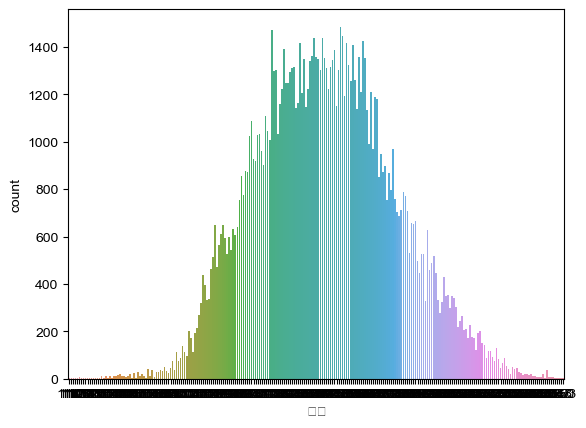

In [17]:
# 쉬운 방법으로 barplot 구현이 가능하다.
sns.countplot(data=df, x='기온')

### histplot (히스토그램)
연속형데이터(실수형)데이터에 적용하며 데이터의 분포를 확인하고자 하는 목적으로 시각화.  
변수의 데이터 전 구간을 등구간(bins)으로 분할하고 해당 구간에 포함 된 데이터의 갯수를 매칭  

In [ ]:
sns.distplot()

<Axes: xlabel='습도', ylabel='Count'>

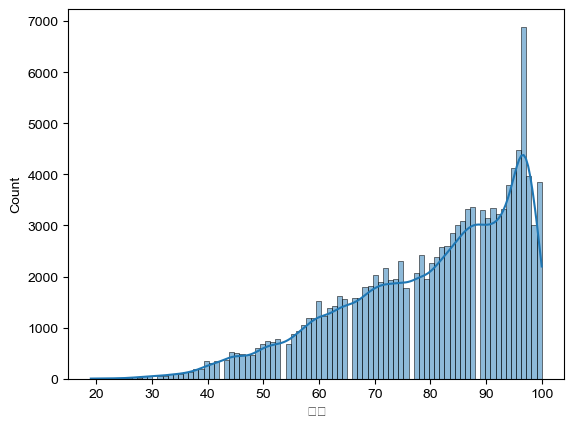

In [21]:
sns.histplot(data=df, x='습도', kde=True)

### scatterplot (산점도)
관측치 하나를 점으로 표현하는 시각화 방법.  
x, y축에 각각 변수를 위치시키고 변수간 관계를 확인하는 용도로 사용합니다.  
상관관계분석, 밀도, 분포, 이상치등 많은 데이터를 얻을 수 있어 분석용 툴로 사용합니다.  
x, y축 모두 연속형데이터에 적용 --> 유의미한 결과를 얻을 수 있음

<Axes: xlabel='기온', ylabel='전력사용량'>

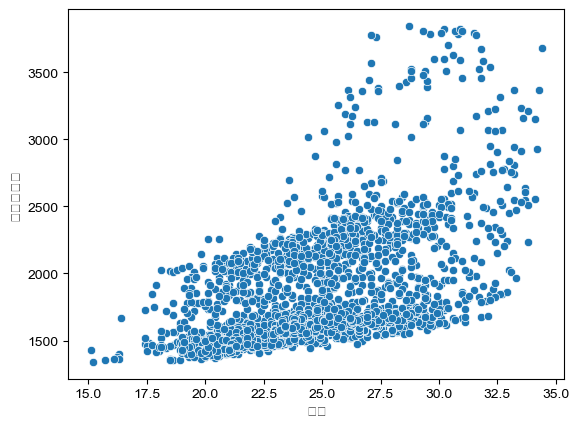

In [33]:
sns.scatterplot(data=df.loc[df['num'] == 23], x='기온', y='전력사용량')

### boxplot
x, y축 각각 변수를 위치시켜서 관계파악 하는 목적으로 사용하는 것은 scatterplot과 동일  
y축에 표시되는 데이터의 분포를 박스형태로 표현  
x축 표현 데이터가 카테고리컬 데이터 좋음, y축 표현 데이터는 연속형 데이터가 좋음

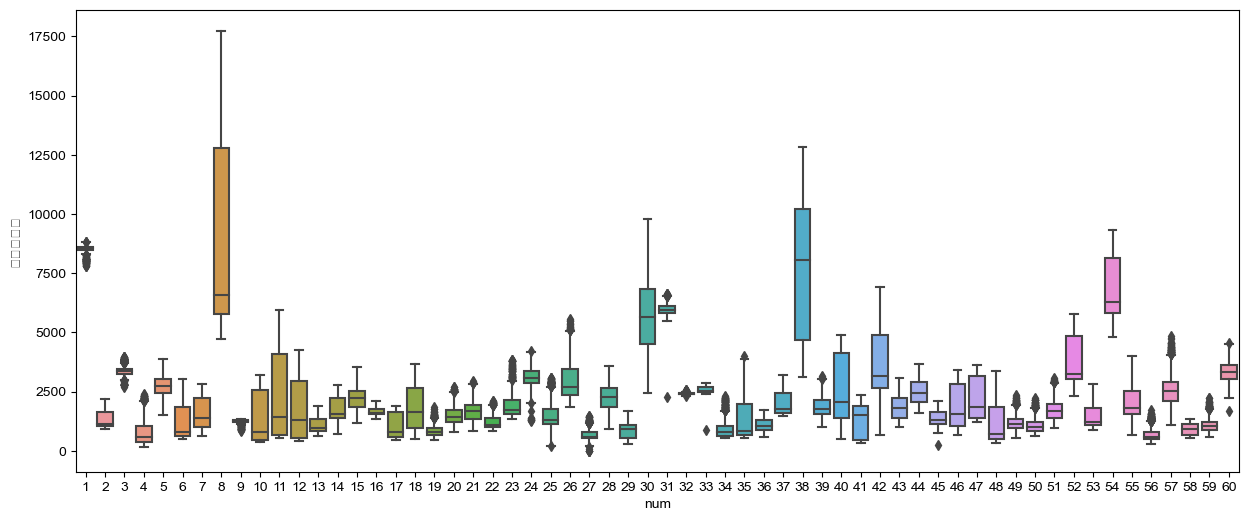

In [32]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='num', y='전력사용량')
plt.show()
# 색구분 박스 상단 사분위수 75%, 중앙라인 중앙값 50%, 사분위수 25%
# 박스 밖 라인 iqr 사분위수 75%, 25% * 1.5
# iqr 범위 밖의 데이터를 --> 이상치
# 검은색 마름로 --> 이상치 데이터

### pairplot
> 각 변수간 상관관계를 확인하는 scatterplot의 확장버전  
데이터프레임의 모든 변수에 대한 상관관계를 그리드 형태의 scatter로 표현합니다.

In [ ]:
# 선형회귀모델 구축시 다중공선성(변수간 관계가 있음)
# 통계학적인 가정 변수들간 독립성 가정

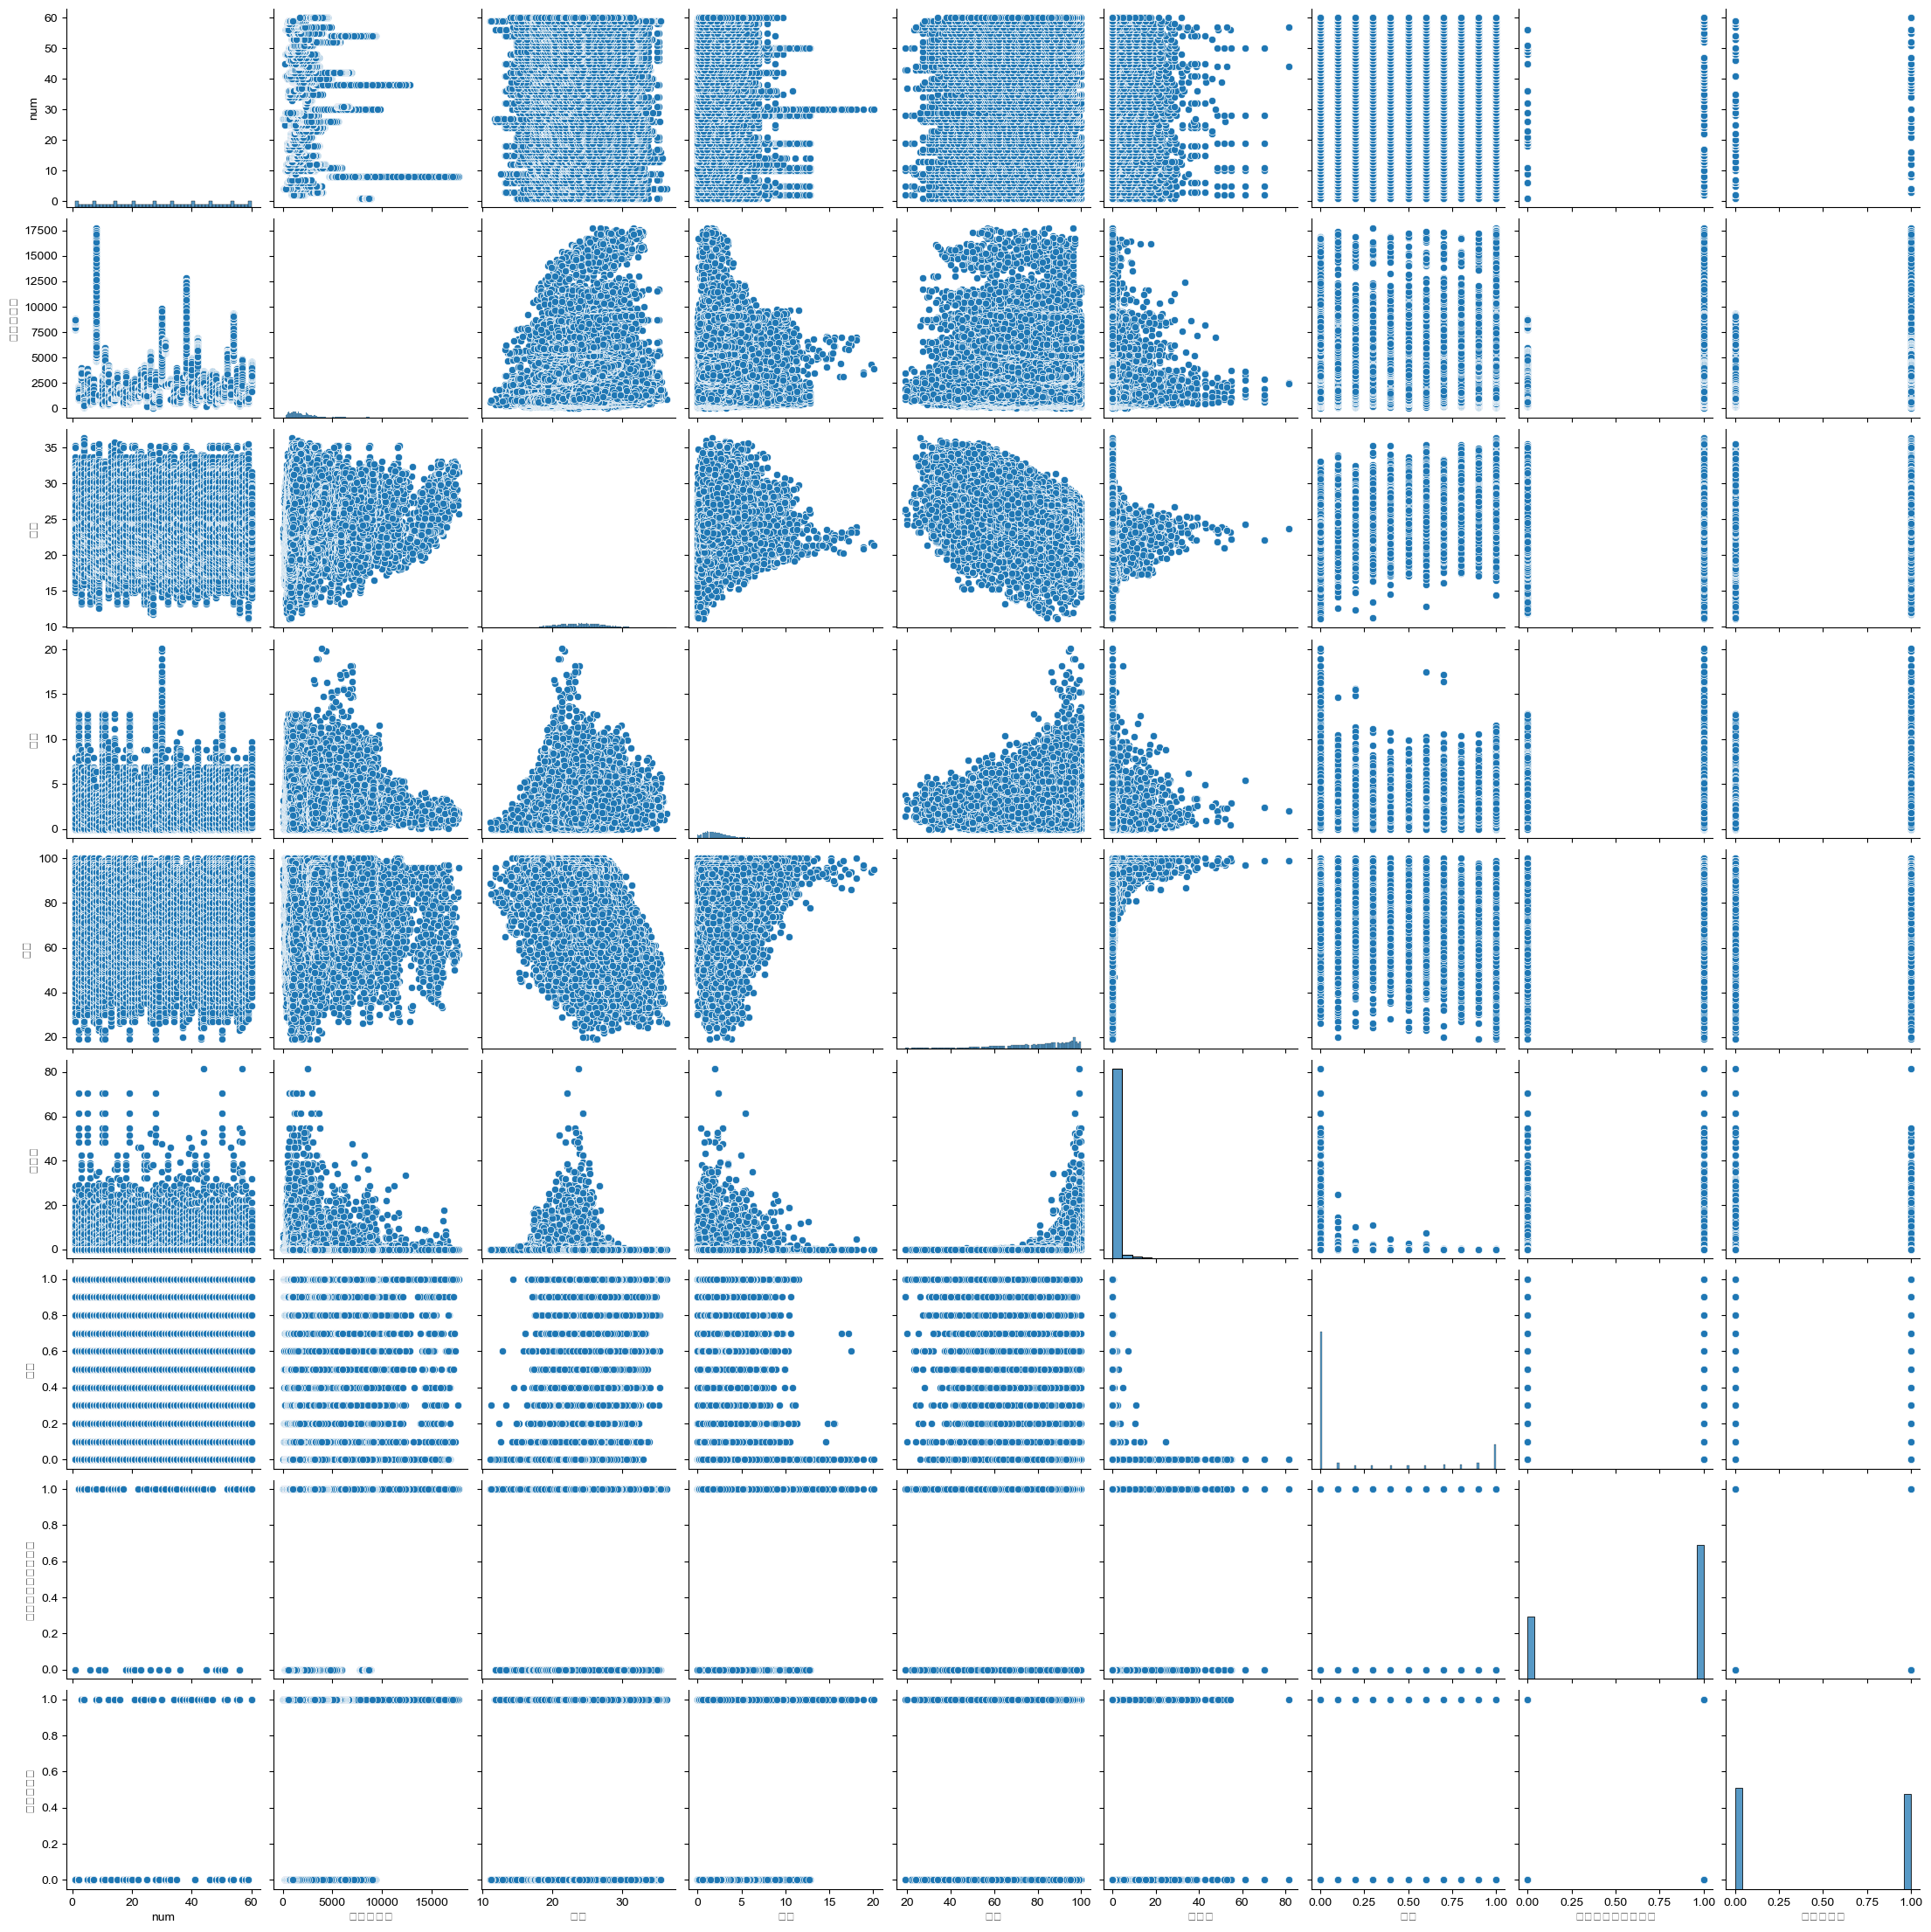

In [34]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot
sns.pairplot(data=df)

### heatmap
> 각 변수간 상관관계를 모두 확인하고자 하는 목적은 pairplot과 같음  
다만 scatterplot 형태가 아닌 상관계수를 계산하여 열지도로 표현  
각 변수간 관계를 한눈에 보기 좋은 형태

In [35]:
df.corr()

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
전력사용량,-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
기온,0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
풍속,-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
습도,0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657
강수량,-0.004673,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-0.003560,-0.016685
일조,-0.013685,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-0.005695,-0.008412
비전기냉방설비운영,0.061031,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000,0.084842
태양광보유,0.099181,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,0.084842,1.000000


<Axes: >

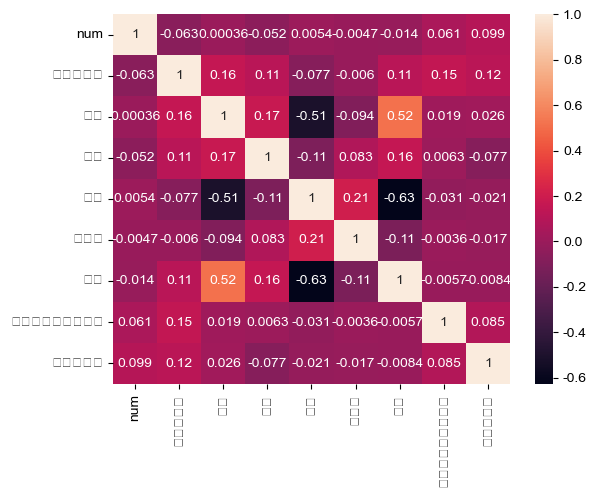

In [38]:
sns.heatmap(data=df.corr())# , annot=True)

In [39]:
# 결측치 분포를 파악하는 용도
df1 = pd.read_csv('./data/energy2.csv', encoding='cp949')
df1.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df1.isna()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,False,False,False,False,False,False,False,True,True
1,False,False,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True
3,False,False,False,False,False,True,False,True,True
4,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
10075,False,False,True,True,True,True,True,True,True
10076,False,False,True,True,True,True,True,True,True
10077,False,False,False,False,False,True,False,False,False
10078,False,False,True,True,True,True,True,True,True


<Axes: >

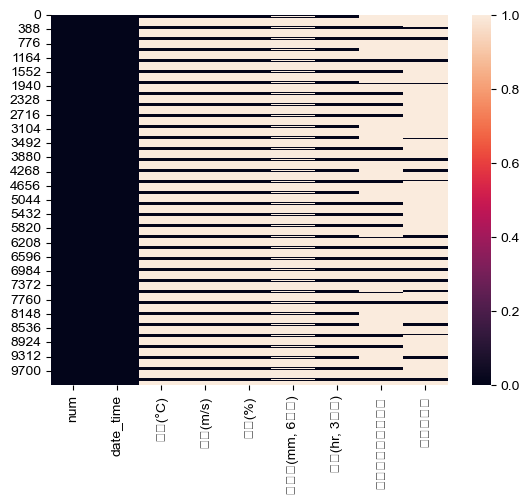

In [41]:
sns.heatmap(data=df1.isna())